In [1]:
# range: 1987-07-02 to 2011-12-31
# RectSphereBivariateSpline requires 0<lat<pi, 0<lon<2pi
# cartopy plots are -90<lat<90, -180<lon<180

import numpy as np
from scipy.interpolate import RectSphereBivariateSpline
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cartopy_features
from datetime import date, datetime, timedelta
from os import remove

DATA_ROOT = '/home/joe/data/'
FILE_PRE = DATA_ROOT + 'podaac-ftp.jpl.nasa.gov/allData/ccmp/L3.0/flk/'

PI = np.pi

EARTH_RADIUS = 6371.008 # km

MIN_LAT, MAX_LAT = -78.375, 78.375
MIN_LON, MAX_LON = -179.875, 179.875
N_LAT, N_LON = 628, 1440

MINUTE = timedelta(minutes=1)
HOUR = timedelta(hours=1)
DAY = timedelta(days=1)
HR_SEC = HOUR.total_seconds()
SIX_HR_SEC = 6*HR_SEC

MIN_DATETIME = datetime(1987,7,2)
MAX_DATETIME = datetime(2012,1,1)
N_DAYS = (MAX_DATETIME-MIN_DATETIME).days

In [2]:
# return lat/lon files
def lat_lon_data(units='deg'):
    lat = np.linspace(MIN_LAT,MAX_LAT,N_LAT)
    lon = np.linspace(MIN_LON,MAX_LON,N_LON)
    if units == 'rad':
        lat = PI*(lat+90)/180
        lon = PI*(lon+180)/180
    return lat, lon

def uv_data(date=MIN_DATETIME, units='m_per_s', flat=False):
    filename = FILE_PRE + date.strftime('%Y/%m/%d/') + '%02i.npz' % (date.hour/6*6,)
    with np.load(filename) as data:
        u,v = data['u'],data['v']
    if units == 'km_per_hr':
        u = 3.6*np.array(u)
        v = 3.6*np.array(v)
    if flat:
        u = np.concatenate(u)
        v = np.concatenate(v)
    return u, v

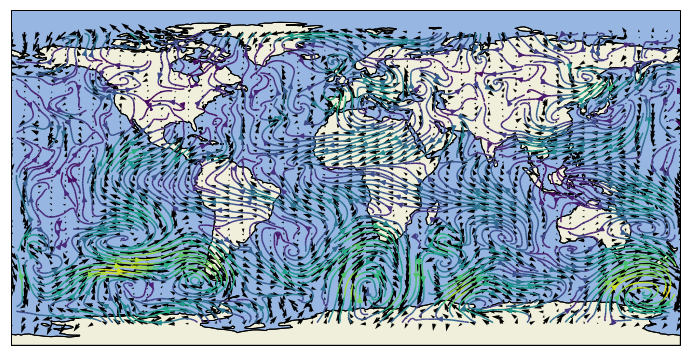

In [12]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy_features.OCEAN, zorder=0)
ax.add_feature(cartopy_features.LAND, zorder=0, edgecolor='black')
ax.set_global()

# interpolate
lat_data,lon_data = lat_lon_data(units='rad')
t = MIN_DATETIME+np.random.randint(N_DAYS)*DAY
#u_data,v_data = uv_data(t)
u_data,v_data = uv_data()
u_spl = RectSphereBivariateSpline(lat_data,lon_data,u_data)
v_spl = RectSphereBivariateSpline(lat_data,lon_data,v_data)

# evaluate
n_lat,n_lon = 50,50
lat = np.linspace(PI/180*(MIN_LAT+90),PI/180*(MAX_LAT+90),n_lat)
lon = np.linspace(PI/180*(MIN_LON+180),PI/180*(MAX_LON+180),n_lon)
lat, lon = np.meshgrid(lat, lon)
u,v = u_spl.ev(lat,lon),v_spl.ev(lat,lon)

# plot
lat = np.linspace(MIN_LAT,MAX_LAT,n_lat)
lon = np.linspace(MIN_LON,MAX_LON,n_lon)
lat, lon = np.meshgrid(lat, lon)
Q = ax.quiver(lon,lat,u,v,transform=ccrs.PlateCarree())
mag = np.sqrt(u*u+v*v)
S = ax.streamplot(lon,lat,u,v,color=mag,density=4,transform=ccrs.PlateCarree())

plt.show()

/usr/lib64/python2.7/site-packages/Cartopy-0.15.0-py2.7-linux-x86_64.egg/cartopy/mpl/geoaxes.py:1711: RuntimeWarning: invalid value encountered in subtract
  u, v = self.projection.transform_vectors(t, x, y, u, v)


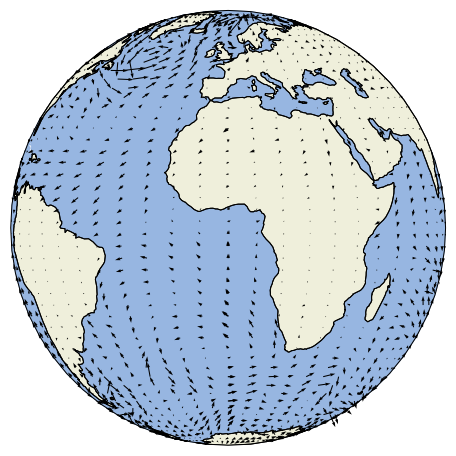

In [4]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection=ccrs.Orthographic())
ax.coastlines()
ax.add_feature(cartopy_features.OCEAN, zorder=0)
ax.add_feature(cartopy_features.LAND, zorder=0, edgecolor='black')
ax.set_global()

# interpolate
lat_data,lon_data = lat_lon_data(units='rad')
t = MIN_DATETIME+np.random.randint(N_DAYS)*DAY
u_data,v_data = uv_data(t)
u_spl = RectSphereBivariateSpline(lat_data,lon_data,u_data)
v_spl = RectSphereBivariateSpline(lat_data,lon_data,v_data)

# evaluate
n_lat,n_lon = 50,50
lat = np.linspace(PI*(MIN_LAT+90)/180,PI*(MAX_LAT+90)/180,n_lat)
lon = np.linspace(PI*(MIN_LON+180)/180,PI*(MAX_LON+180)/180,n_lon)
lat, lon = np.meshgrid(lat, lon)
u,v = u_spl.ev(lat,lon),v_spl.ev(lat,lon)

# plot
lat = np.linspace(MIN_LAT,MAX_LAT,n_lat)
lon = np.linspace(MIN_LON,MAX_LON,n_lon)
lat, lon = np.meshgrid(lat, lon)
Q = ax.quiver(lon,lat,u,v,transform=ccrs.RotatedPole())
#mag = np.sqrt(u*u+v*v)
#S = ax.streamplot(lon,lat,u,v,color=mag,density=4,transform=ccrs.RotatedPole())

plt.show()

In [5]:
vf_video_cache = True
if not vf_video_cache:

    fig = plt.figure()
    ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.stock_img()
    ax.set_global()
    
    # interpolate
    lat_data, lon_data = lat_lon_data(units='rad')
    u_data, v_data = uv_data(MIN_DATETIME)

    u_spl = RectSphereBivariateSpline(lat_data,lon_data,u_data)
    v_spl = RectSphereBivariateSpline(lat_data,lon_data,v_data)

    # vector field
    lat = np.linspace(PI*(MIN_LAT+90)/180,PI*(MAX_LAT+90)/180, 50)
    lon = np.linspace(PI*(MIN_LON+180)/180,PI*(MAX_LON+180)/180, 50)
    lat,lon = np.meshgrid(lat, lon)
    u,v = u_spl.ev(lat,lon),v_spl.ev(lat,lon)

    lat = np.linspace(MIN_LAT,MAX_LAT,50)
    lon = np.linspace(MIN_LON,MAX_LON,50)
    lat,lon = np.meshgrid(lat,lon)
    
    Q = ax.quiver(lon,lat,u,v,transform=ccrs.PlateCarree())

    def update_quiver(date):
        u_data,v_data = uv_data(date)
    
        u_spl = RectSphereBivariateSpline(lat_data,lon_data,u_data)
        v_spl = RectSphereBivariateSpline(lat_data,lon_data,v_data)
    
        u = u_spl.ev(lat,lon)
        v = v_spl.ev(lat,lon)

        Q.set_UVC(u,v)

        return Q,

    dates = [MIN_DATETIME + i*DAY for i in range(N_DAYS)]
    anim = animation.FuncAnimation(fig, update_quiver, dates, interval=60, blit=True)
    plt.tight_layout()
    anim.save('vid/vf.map.mp4', dpi=100)
    plt.close()
    vf_video_cache = True

In [6]:
%%HTML
<video controls src='vid/vf.map.mp4' type='video/mp4'></video>

In [7]:
def integrate(t0, tn, n_lat, n_lon, t_inc = 1*MINUTE):

    lat_data,lon_data = lat_lon_data(units='rad')
    
    lat = np.linspace(MIN_LAT/180*PI,MAX_LAT/180*PI,n_lat)
    lon = np.linspace(MIN_LON/180*PI,MAX_LON/180*PI,n_lon)
    lon2d, lat2d = np.meshgrid(lon,lat)

    next_data_time = datetime(t0.year,t0.month,t0.day,t0.hour/6*6)

    u_data,v_data = ['',''],['','']
    u_data[1],v_data[1] = uv_data(next_data_time, units='km_per_hr')

    u_spl,v_spl = ['',''],['','']
    u_spl[1] = RectSphereBivariateSpline(lat_data,lon_data,u_data[1])
    v_spl[1] = RectSphereBivariateSpline(lat_data,lon_data,v_data[1])

    traj = [['' for lon_idx in range(n_lon)] for lat_idx in range(n_lat)]
    for lat_idx in range(n_lat):
        for lon_idx in range(n_lon):
            traj[lat_idx][lon_idx] = [(lat2d[lat_idx,lon_idx],lon2d[lat_idx,lon_idx])]
    
    t = t0
    t_inc_sec = t_inc.total_seconds()
    dt = t_inc_sec/HR_SEC
    while t < tn:
        last_data_time = next_data_time
        next_data_time = last_data_time + 6*HOUR

        print t, tn-t
        
        u_data[0],v_data[0] = u_data[1],v_data[1]
        u_data[1],v_data[1] = uv_data(next_data_time, units='km_per_hr')
        
        u_spl[0],v_spl[0] = u_spl[1],v_spl[1]
        u_spl[1] = RectSphereBivariateSpline(lat_data,lon_data,u_data[1])
        v_spl[1] = RectSphereBivariateSpline(lat_data,lon_data,v_data[1])
        
        while t < next_data_time:
            
            w1 = (next_data_time-t).total_seconds()/SIX_HR_SEC
            w2 = (t-last_data_time).total_seconds()/SIX_HR_SEC
            
            for lat_idx in range(n_lat):
                for lon_idx in range(n_lon):

                    # precompute trig vals
                    lat,lon = traj[lat_idx][lon_idx][-1]
                    sin_lat, cos_lat = np.sin(lat), np.cos(lat)
                    sin_lon, cos_lon = np.sin(lon), np.cos(lon)

                    # project up to surface of earth
                    p = EARTH_RADIUS*np.array([cos_lat*cos_lon,cos_lat*sin_lon,sin_lat])

                    # vectors tangent to lat and lon
                    lat_tan = np.array([-sin_lon,cos_lon,0])
                    lon_tan = np.array([-sin_lat*cos_lon,-sin_lat*sin_lon,cos_lat])

                    # flow forward
                    lat,lon = .5*PI+lat,PI+lon
                    dp = (w1*u_spl[0].ev(lat,lon) + w2*u_spl[1].ev(lat,lon))*lat_tan 
                    dp += (w1*v_spl[0].ev(lat,lon) + w2*v_spl[1].ev(lat,lon))*lon_tan
                    dp *= dt
                    p += dp

                    # nondimensionalize
                    p /= np.linalg.norm(p)
                    lat,lon = np.arcsin(p[2]),np.arctan2(p[1],p[0])

                    # truncate lats out of bounds and wrap lons around
                    lat = max(lat,MIN_LAT/180*PI)
                    lat = min(lat,MAX_LAT/180*PI)
                    if abs(lon)>PI:
                        lon-=np.sign(lon)*2*PI

                    traj[lat_idx][lon_idx].append((lat,lon))

            t += t_inc
            
    for lat_idx in range(n_lat):
        for lon_idx in range(n_lon):
            traj[lat_idx][lon_idx] = np.array(traj[lat_idx][lon_idx])
            
    return traj

# integrate
t0, tn = MIN_DATETIME, MIN_DATETIME+30*DAY
n_lat, n_lon = 100,100
#traj = integrate(t0,tn,n_lat,n_lon)

## plot
#fig = plt.figure(figsize=(12,8))
#ax = plt.subplot(111, projection=ccrs.PlateCarree())
#ax.coastlines()
#ax.add_feature(cartopy_features.OCEAN, zorder=0)
#ax.add_feature(cartopy_features.LAND, zorder=0, edgecolor='black')
#ax.set_global()
#for lat_idx in range(n_lat):
#    for lon_idx in range(n_lon):
#        lat=np.rad2deg(traj[lat_idx][lon_idx][:,0])
#        lon=np.rad2deg(traj[lat_idx][lon_idx][:,1])
#        ax.plot(lon,lat,'r-',marker='o',transform=ccrs.PlateCarree())
#plt.show()

In [8]:
def geodesic_dist((lat1,lon1),(lat2,lon2)):
    return np.arccos(np.cos(lat1)*np.cos(lat2)*np.cos(lon1-lon2)+np.sin(lat1)*np.sin(lat2))

def dlat(lat1,lat2):
    return np.arccos(np.cos(lat1)*np.cos(lat2)+np.sin(lat1)*np.sin(lat2))

def dlon(lon1,lon2):
    return np.arccos(np.cos(lon1-lon2))

#J = np.empty([2,2])
#ftle = np.zeros([n_lat-2,n_lon])

#for lat_idx in range(1,n_lat-1):
#    for lon_idx in range(n_lon):     

#        J[0,0] = dlat(traj[lat_idx+1][lon_idx][-1,0],traj[lat_idx-1][lon_idx][-1,0])
#        J[0,1] = dlat(traj[lat_idx][(lon_idx+1)%n_lon][-1,0],traj[lat_idx][(lon_idx-1)%n_lon][-1,0])
#        J[1,0] = dlon(traj[lat_idx+1][lon_idx][-1,1],traj[lat_idx-1][lon_idx][-1,1])
#        J[1,1] = dlon(traj[lat_idx][(lon_idx+1)%n_lon][-1,1],traj[lat_idx][(lon_idx-1)%n_lon][-1,1])

#        J[:,0] /= dlat(traj[lat_idx+1][lon_idx][0,0],traj[lat_idx-1][lon_idx][0,0])
#        J[:,1] /= dlon(traj[lat_idx][(lon_idx+1)%n_lon][0,1],traj[lat_idx][(lon_idx-1)%n_lon][0,1])
                
#        ftle[lat_idx-1,lon_idx] = np.log(np.sqrt(max(np.linalg.eig(J.T.dot(J))[0])))

        
#fig = plt.figure(figsize=(12,8))
#ax = plt.subplot(111, projection=ccrs.PlateCarree())
#ax.coastlines()
#ax.set_global()
#ax.imshow(ftle,interpolation='nearest',origin='bottom',extent=(MIN_LON,MAX_LON,MIN_LAT,MAX_LAT))

In [9]:
n_lat,n_lon=2,3
lat_idx,lon_idx=0,0

traj = np.empty([n_lat,n_lon,2,4])
add_on = np.zeros([n_lat,n_lon,2,8])
print traj.shape
traj = np.concatenate((traj,add_on),axis=-1)
print traj.shape

traj = np.empty([n_lat,n_lon,2,4])
add_on = np.zeros([n_lat,n_lon,2])
print traj.shape
traj = np.concatenate((traj,add_on[...,None]),axis=-1)
print traj.shape

xxx = np.array([[1,2,3],[4,5,6]])
print xxx
xxx = np.concatenate(xxx)
print xxx
xxx = np.reshape(xxx,(2,3))
print xxx

(2, 3, 2, 4)
(2, 3, 2, 12)
(2, 3, 2, 4)
(2, 3, 2, 5)
[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]


In [10]:

#print wind.wind.rep.__doc__
#print wind.wind.ev.__doc__

# import timeit

# lat_data,lon_data = lat_lon_data(units='rad')
# u_data,v_data = uv_data()
# uflat = np.concatenate(u_data)
# vflat = np.concatenate(v_data)

# n_lat,n_lon = N_LAT,N_LON
# lat = np.linspace(PI/180*(MIN_LAT+90),PI/180*(MAX_LAT+90),n_lat)
# lon = np.linspace(PI/180*(MIN_LON+180),PI/180*(MAX_LON+180),n_lon)
# lon2d, lat2d = np.meshgrid(lon, lat)

# # time comparisons
# start_time = timeit.default_timer()
# utx,uty,uc,uier=wind.wind.rep(uflat)
# vtx,vty,vc,vier=wind.wind.rep(vflat)
# print 'fortran rep:', timeit.default_timer() - start_time, 'err codes:', uier, vier

# start_time = timeit.default_timer()
# u_spl = RectSphereBivariateSpline(lat_data,lon_data,u_data)
# v_spl = RectSphereBivariateSpline(lat_data,lon_data,v_data)
# print 'python rep:', timeit.default_timer() - start_time

# start_time = timeit.default_timer()
# u1,uier = wind.wind.ev(utx,uty,uc,lat,lon)
# u1 = np.reshape(u1,(n_lat,n_lon))
# v1,vier = wind.wind.ev(vtx,vty,vc,lat,lon)
# v1 = np.reshape(u1,(n_lat,n_lon))
# print 'fortran ev:', timeit.default_timer() - start_time, 'err codes:', uier, vier

# start_time = timeit.default_timer()
# u2 = u_spl.ev(lat2d,lon2d)
# v2 = v_spl.ev(lat2d,lon2d)
# print 'python ev:', timeit.default_timer() - start_time

# print u1.shape, u2.shape, np.sum(abs(u1-u2))

# #print sum(abs(u1-u2))

# # # plotting
# # fig = plt.figure(figsize=(12,16))
# # ax1 = plt.subplot(211, projection=ccrs.PlateCarree())
# # ax2 = plt.subplot(212, projection=ccrs.PlateCarree())

# # for a in [ax1,ax2]:
# #     a.coastlines()
# #     a.add_feature(cartopy_features.OCEAN, zorder=0)
# #     a.add_feature(cartopy_features.LAND, zorder=0, edgecolor='black')
# #     a.set_global()

# # lat = np.linspace(MIN_LAT,MAX_LAT,n_lat)
# # lon = np.linspace(MIN_LON,MAX_LON,n_lon)
# # lat, lon = np.meshgrid(lat, lon)
# # Q1 = ax1.quiver(lon,lat,u1,v1,transform=ccrs.PlateCarree())
# # Q2 = ax2.quiver(lon,lat,u2,v2,transform=ccrs.PlateCarree())

# # mag1 = np.sqrt(u1*u1+v1*v1)
# # S1 = ax1.streamplot(lon,lat,u1,v1,color=mag,density=4,transform=ccrs.PlateCarree())
# # mag2 = np.sqrt(u2*u2+v2*v2)
# # S2 = ax2.streamplot(lon,lat,u2,v2,color=mag,density=4,transform=ccrs.PlateCarree())

# # plt.show()

In [11]:
import wind

print wind.wind.__doc__

class spline(object):
    def __init__(self,x,y,z,iopt=[0,0,0],ider=[-1,0,-1,0],
                 z0=None,z1=None,s=0.):
        
        nx,tx,ny,ty,c,fp,ier = wind.rep(iopt,ider,
                                        x.copy(),y.copy(),z.copy(),
                                        z0,z1,s)
        if not ier in [0, -1, -2]:
            print 'spline rep ier:', ier
        
        self.fp = fp
        self.tx = tx[:nx]
        self.ty = ty[:ny]
        self.c = c[:(nx-4)*(ny-4)]
    
#lat_data,lon_data = lat_lon_data(units='rad')
#u_data,v_data = uv_data(flat=True)
#u_spl = spline(lat_data,lon_data,u_data)

ImportError: ./wind.so: undefined symbol: fpchec_